In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport ooaga_tests
%aimport ooamaga_zdt3
%aimport ooPMOT_tests

In [31]:
import numpy as np
import math

import matplotlib.pyplot as plt

from ooaga_tests import aga
from ooamaga_zdt3 import amaga
from ooamaga_zdt3 import mgbase
from ooPMOT_tests import basePMOT

In [21]:
#def fitness_optimal(x):
#    g = 1 # + 9 * sum(x[1:]) / (len(x) - 1)
#    f1 = x[0]
#    f2 = g * (1 - (x[0] / g)**2)
#    f = [f1, f2]
#    return f

In [20]:
a= [0, 2, 4]
b = np.sum(a[1:])
print(b)

6


In [20]:
def fitness_optimal(x):
    sum1 = 0
    sum2 = 0
    for i in range(len(x)):
        sum1 += (x[i] - 1/np.sqrt(3))**2
        sum2 += (x[i] + 1/np.sqrt(3))**2
    f1 = 1 - np.exp(-sum1)
    f2 = 1 - np.exp(-sum2)
    f = [f1, f2]
    return f

[[-0.03798792 -0.03798792 -0.03798792]
 [-0.01844206 -0.01844206 -0.01844206]
 [-0.10555988 -0.10555988 -0.10555988]
 ...
 [-0.0611606  -0.0611606  -0.0611606 ]
 [ 0.14734045  0.14734045  0.14734045]
 [-0.0095396  -0.0095396  -0.0095396 ]]


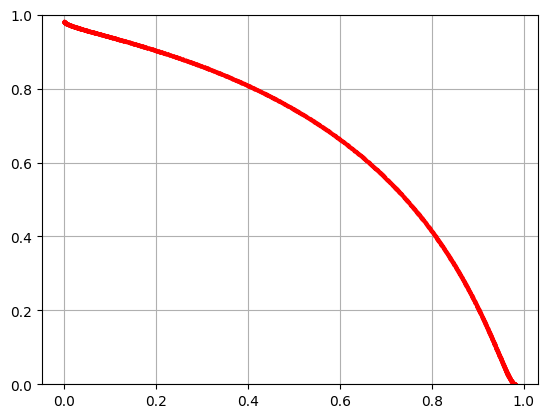

In [23]:
optim = np.random.uniform(- 1/np.sqrt(3), 1/np.sqrt(3), (5000, 3))
for i in range(len(optim)):
    optim[i][1] = optim[i][0]
    optim[i][2] = optim[i][0]
print(optim)
pareto_optimal = [0] * len(optim)
for i in range(len(optim)):
    pareto_optimal[i] = fitness_optimal(x=optim[i])
    plt.plot(pareto_optimal[i][0], pareto_optimal[i][1], 'o', color = 'r', markersize = 1.5)

plt.ylim([0.0, 1.0])
plt.grid(True, 'major')
plt.show()

In [24]:
np.random.uniform(- 4, 4, 3)

array([-3.35880659,  0.54521258, -0.58664154])

In [32]:
np.random.seed(1234)

#q.setVector(np.array([0,1]))
p = 62
for i in range(3):
    q=mgbase(np.random.uniform(- 4, 4, 3))
    q.setRanRange(-4, 4)
    #print(q.fitFun())
    mymaga=amaga(q, 400)
    mymaga.setOption('nd', int(mymaga.getPopulationSize() * p/100))
    mymaga.setOption('ne', 40)
    mymaga.setOption('nn', 40)
    mymaga.setOption('nm', int((mymaga.getPopulationSize() * (0.8 - p/100))))
    mymaga.setOption('nCanMutate', 60)
    mymaga.setOption('nCanProcreate', 60)
    mymaga.printOptions()
    for q in range(40):
        #print('q=',q)
        mymaga.evalFitness(ng = q)
        mymaga.buildFronts()
        #mymaga.sortByFronts()
        mymaga.buildCrowds()
        mymaga.sortByCrowds()
        #mymaga.mutateDegenerates(q)
        #mymaga.printStatus()
        #mymaga.plotPopulation2d().
        mymaga.repopulate(q)

    mymaga.buildFronts()
    #mymaga.sortByFronts()
    mymaga.buildCrowds()
    mymaga.sortByCrowds()
    front_size = mymaga.getFrontSize(0)
    m2 = mymaga.metricM2(0.5)
    front_spread = mymaga.frontSpread()
    convergence_metric = mymaga.convergenceMetric(pareto_optimal=pareto_optimal)

    print(f'Iteration: {i}')
    print(f'Front Size: {front_size}')
    print(f'M2: {m2}')
    print(f'Front Spread: {front_spread}')
    print(f'Convergence Metric: {convergence_metric}')
    print('-------------------')
    
    
    #for i in range(len(optim)):
    #    plt.plot(pareto_optimal[i][0], pareto_optimal[i][1], 'o', color = 'r', markersize = 1.5)
    #plt.plot([], [], 'o', color='r', label='Optimal', markersize=1.5)
    ##plt.plot([], [], 'o', color= 'b', label='Pareto Front', markersize=5.0)
    #mymaga.plotSatus2d()
    #plt.title('FON Test Pareto (Sort By Front)', fontweight='bold')
    #plt.xlabel('f1(x)')
    #plt.ylabel('f2(x)')
    #plt.xlim([0.0, 1.2])
    #plt.ylim([0.0, 1.0])
    #plt.grid(True, 'major')
    #plt.legend()
    #plt.savefig(f'same_parameters/paretos/SortByFront_FON_{p}')
    #plt.show()

aga run options: ne= 40 nm= 72 nd= 248 nn= 40 nCanMutate= 60 nCanProcreate= 60
Iteration: 0
Front Size: 296
M2: 62.277966101694915
Front Spread: 1.3997760748745487
Convergence Metric: 0.00027170391865256633
-------------------
aga run options: ne= 40 nm= 72 nd= 248 nn= 40 nCanMutate= 60 nCanProcreate= 60
Iteration: 1
Front Size: 308
M2: 78.52117263843648
Front Spread: 1.4003280967678213
Convergence Metric: 0.00028156462092481616
-------------------
aga run options: ne= 40 nm= 72 nd= 248 nn= 40 nCanMutate= 60 nCanProcreate= 60
Iteration: 2
Front Size: 302
M2: 59.730897009966775
Front Spread: 1.399735413425951
Convergence Metric: 0.0002737189681087474
-------------------


In [67]:
a = np.random.rand(30)
print(a)
total = 0
for i in range(1, len(a)):
    total = total + a[i]
print(total, sum(a[1:]) / (len(a) - 1))

[0.19487184 0.64576911 0.39148608 0.79269702 0.31594391 0.18882115
 0.81584884 0.85931731 0.47201047 0.03750204 0.76442788 0.40819849
 0.77343337 0.80816451 0.6480314  0.15087936 0.21230361 0.20068052
 0.21912396 0.0054257  0.50261586 0.48595054 0.07501825 0.42783126
 0.47522239 0.58579405 0.8191465  0.81256199 0.93214355 0.44079436]
14.267143493652046 0.4919704652983464


In [32]:
scale = np.linspace(1, 99, 400)
scale/100

array([0.01      , 0.01245614, 0.01491228, 0.01736842, 0.01982456,
       0.0222807 , 0.02473684, 0.02719298, 0.02964912, 0.03210526,
       0.0345614 , 0.03701754, 0.03947368, 0.04192982, 0.04438596,
       0.04684211, 0.04929825, 0.05175439, 0.05421053, 0.05666667,
       0.05912281, 0.06157895, 0.06403509, 0.06649123, 0.06894737,
       0.07140351, 0.07385965, 0.07631579, 0.07877193, 0.08122807,
       0.08368421, 0.08614035, 0.08859649, 0.09105263, 0.09350877,
       0.09596491, 0.09842105, 0.10087719, 0.10333333, 0.10578947,
       0.10824561, 0.11070175, 0.11315789, 0.11561404, 0.11807018,
       0.12052632, 0.12298246, 0.1254386 , 0.12789474, 0.13035088,
       0.13280702, 0.13526316, 0.1377193 , 0.14017544, 0.14263158,
       0.14508772, 0.14754386, 0.15      , 0.15245614, 0.15491228,
       0.15736842, 0.15982456, 0.1622807 , 0.16473684, 0.16719298,
       0.16964912, 0.17210526, 0.1745614 , 0.17701754, 0.17947368,
       0.18192982, 0.18438596, 0.18684211, 0.18929825, 0.19175